In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
chartLab48 = pd.read_csv("../Code/output/chartLab48Item20.csv")

In [3]:
chartLab48.head()

,SUBJECT_ID,HADM_ID,ITEMID,CHARTTIME,VALUE
0,36,165660,FIO,2134-05-12T12:00:00.000-04:00,100.00
1,36,165660,PH,2134-05-12T12:35:00.000-04:00,7.29
2,36,165660,HR,2134-05-12T13:00:00.000-04:00,86.00
3,36,165660,SBP,2134-05-12T13:00:00.000-04:00,137.00
4,36,165660,DBP,2134-05-12T13:00:00.000-04:00,72.00


In [4]:
chartLab48.info() # 18920178 events

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18920178 entries, 0 to 18920177
Data columns (total 5 columns):
 #   Column      Dtype  
---  ------      -----  
 0   SUBJECT_ID  int64  
 1   HADM_ID     int64  
 2   ITEMID      object 
 3   CHARTTIME   object 
 4   VALUE       float64
dtypes: float64(1), int64(2), object(2)
memory usage: 721.7+ MB


In [5]:
patients = pd.read_csv("../Code/output/patientsInfo.csv")

In [6]:
patients.head()

,SUBJECT_ID,HADM_ID,Age,GENDER,HOSPITAL_EXPIRE_FLAG
0,22,165315,64.97,F,0
1,23,152223,71.18,M,0
2,23,124321,75.31,M,0
3,24,161859,39.04,M,0
4,25,129635,58.99,M,0


In [7]:
patients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46545 entries, 0 to 46544
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   SUBJECT_ID            46545 non-null  int64  
 1   HADM_ID               46545 non-null  int64  
 2   Age                   46545 non-null  float64
 3   GENDER                46545 non-null  object 
 4   HOSPITAL_EXPIRE_FLAG  46545 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.8+ MB


In [8]:
patients[['GENDER_01']] = patients.apply(lambda x: 0 if x.GENDER=='F' else 1, axis=1)

In [9]:
patients.head()

,SUBJECT_ID,HADM_ID,Age,GENDER,HOSPITAL_EXPIRE_FLAG,GENDER_01
0,22,165315,64.97,F,0,0
1,23,152223,71.18,M,0,1
2,23,124321,75.31,M,0,1
3,24,161859,39.04,M,0,1
4,25,129635,58.99,M,0,1


# Clean data--outliers

In [10]:
# GLU
chartLab48 = chartLab48.drop(chartLab48[(chartLab48.ITEMID=='GLU') & (chartLab48.VALUE>5000)].index) ##  entries

In [11]:
# DBP
chartLab48 = chartLab48.drop(chartLab48[(chartLab48.ITEMID=='DBP') & (chartLab48.VALUE>1000)].index) ##  entries

In [12]:
# FIO -- ignore
# chart24 = chart24.drop(chart24[(chart24.ITEMID=='FIO') & (chart24.VALUE>100)].index) ##  entries

In [13]:
# HEIGHT
chartLab48 = chartLab48.drop(chartLab48[(chartLab48.ITEMID=='HEIGHT') & (chartLab48.VALUE>300)].index) ##  entries

In [14]:
# HR
chartLab48 = chartLab48.drop(chartLab48[(chartLab48.ITEMID=='HR') & (chartLab48.VALUE>10000)].index) ##  entries

In [15]:
# MBP
chartLab48 = chartLab48.drop(chartLab48[(chartLab48.ITEMID=='MBP') & (chartLab48.VALUE>1000)].index) ##  entries

In [16]:
# OS
chartLab48 = chartLab48.drop(chartLab48[(chartLab48.ITEMID=='OS') & (chartLab48.VALUE>10000)].index) ##  entries

In [17]:
# PH
chartLab48 = chartLab48.drop(chartLab48[(chartLab48.ITEMID=='PH') & (chartLab48.VALUE>10)].index) ##   entries

In [18]:
# RESPR
chartLab48 = chartLab48.drop(chartLab48[(chartLab48.ITEMID=='RESPR') & (chartLab48.VALUE>1000)].index) ##   entries

In [19]:
# SBP
chartLab48 = chartLab48.drop(chartLab48[(chartLab48.ITEMID=='SBP') & (chartLab48.VALUE>1000)].index) ##   entries

In [20]:
# TEMP
chartLab48 = chartLab48.drop(chartLab48[(chartLab48.ITEMID=='TEMP') & (chartLab48.VALUE>50)].index) 
chartLab48 = chartLab48.drop(chartLab48[(chartLab48.ITEMID=='TEMP') & (chartLab48.VALUE<20)].index) ##   entries

In [21]:
# weight
chartLab48 = chartLab48.drop(chartLab48[(chartLab48.ITEMID=='WEIGHT') & (chartLab48.VALUE>1000)].index) 
chartLab48 = chartLab48.drop(chartLab48[(chartLab48.ITEMID=='WEIGHT') & (chartLab48.VALUE<10)].index) ##   entries

In [22]:
chartLab48.info() # 18,918,380

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18918366 entries, 0 to 18920177
Data columns (total 5 columns):
 #   Column      Dtype  
---  ------      -----  
 0   SUBJECT_ID  int64  
 1   HADM_ID     int64  
 2   ITEMID      object 
 3   CHARTTIME   object 
 4   VALUE       float64
dtypes: float64(1), int64(2), object(2)
memory usage: 866.0+ MB


In [23]:
chartLab48_mean = chartLab48[['HADM_ID', 'ITEMID', 'VALUE']].groupby(['HADM_ID', 'ITEMID'], as_index=False).mean()

In [24]:
len(chartLab48_mean['HADM_ID'].unique()) ## 46237 admission, 20 itemid

46237

In [25]:
chartLab48_mean.head()

,HADM_ID,ITEMID,VALUE
0,100001,DBP,90.333333
1,100001,GLU,197.920000
2,100001,GMR,6.000000
3,100001,GO,4.000000
4,100001,GVR,5.000000


In [26]:
# pivot table to have each itemid as one column
chartLab48_pivot = chartLab48_mean.pivot(index='HADM_ID', columns = 'ITEMID', values='VALUE')

In [27]:
chartLab48_pivot.head()

ITEMID,CRR,DBP,FIO,GLU,GMR,GO,GT,GVR,HEIGHT,HR,MBP,OS,PH,POTA,RESPR,SBP,TEMP,UREA,WBC,WEIGHT
HADM_ID,,,,,,,,,,,,,,,,,,,,
100001,NaN,90.333333,NaN,197.920000,6.00,4.000000,NaN,5.000000,NaN,117.000000,110.410256,97.600000,6.750000,3.900000,17.300000,176.666667,37.152778,31.285714,12.500000,98.010000
100003,NaN,60.615385,NaN,96.571429,6.00,3.916667,NaN,5.000000,NaN,81.218182,73.980769,98.100000,6.746667,4.766667,15.818182,116.519231,36.247475,40.666667,13.625000,84.743333
100006,NaN,77.666667,NaN,153.583333,6.00,4.000000,15.000000,5.000000,NaN,110.680000,97.298633,96.296296,7.366667,4.050000,19.000000,136.562500,36.409091,14.000000,15.100000,57.000000
100007,NaN,61.046512,NaN,132.750000,6.00,3.846154,14.230769,4.384615,NaN,74.139535,86.166667,99.409091,NaN,4.366667,16.613636,138.906977,36.716042,13.000000,9.500000,55.099998
100009,NaN,50.404255,70.0,143.478261,4.75,4.000000,NaN,4.000000,182.94,67.480000,65.340426,96.150000,7.372174,4.076923,23.392857,109.042553,36.791667,12.500000,14.466667,116.912500


In [28]:
chartLab48_pivot.describe()

ITEMID,CRR,DBP,FIO,GLU,GMR,GO,GT,GVR,HEIGHT,HR,MBP,OS,PH,POTA,RESPR,SBP,TEMP,UREA,WBC,WEIGHT
count,707.000000,45590.000000,11582.000000,45754.000000,45634.000000,45078.000000,25141.000000,45595.000000,9051.000000,45590.000000,45586.000000,45783.000000,33283.000000,45546.000000,45564.000000,45590.000000,45266.000000,45431.000000,45301.000000,36516.000000
mean,0.165660,60.773526,51.437699,136.829144,5.443846,3.527791,12.455453,3.722410,168.640430,84.907594,78.339436,96.709278,7.080391,4.114979,18.278322,119.543801,36.834234,24.595155,11.525579,81.968122
std,0.329933,10.689155,24.802941,41.633963,1.018348,0.686043,3.100995,1.496881,15.034067,14.827991,11.015054,3.406703,0.657993,0.502612,3.819177,16.827420,0.587077,19.810569,8.732339,24.413054
min,0.000000,0.000000,0.000000,21.000000,1.000000,1.000000,3.000000,1.000000,0.000000,26.357143,17.428571,13.500000,0.000000,1.942857,5.272727,0.000000,30.000000,1.000000,0.066667,10.000000
25%,0.000000,53.500000,42.500000,111.000000,5.285714,3.333333,10.733333,2.647059,162.780000,74.553783,70.762401,95.770492,7.139288,3.800000,15.642857,107.614489,36.482907,12.333333,7.750000,66.000000
50%,0.000000,59.740000,50.666667,128.250000,6.000000,3.818182,13.750000,4.384615,170.090000,84.015873,77.000000,97.074074,7.340909,4.055903,17.782609,117.375000,36.814815,18.000000,10.428571,78.699997
75%,0.141429,67.000000,61.666667,151.245192,6.000000,4.000000,15.000000,5.000000,177.900000,94.420217,84.815949,98.224490,7.396667,4.366667,20.400000,129.956522,37.182540,29.500000,13.680000,93.696249
max,2.000000,127.097561,1001.000000,791.500000,6.000000,4.000000,15.000000,5.000000,284.240000,207.485714,140.564115,288.829787,9.000000,30.895238,48.000000,215.833333,40.833317,248.166667,579.533333,670.000000


# Null entry imputation

In [29]:
# null entry imputation-- CRR 0.0
chartLab48_pivot['CRR'].fillna(0.0, inplace=True)

In [30]:
# null entry imputation-- DBP 59.0
chartLab48_pivot['DBP'].fillna(59.0, inplace=True)

In [31]:
# null entry imputation-- FIO 0.21
chartLab48_pivot['FIO'].fillna(52, inplace=True)

In [32]:
# null entry imputation-- GLU 128
chartLab48_pivot['GLU'].fillna(128, inplace=True)

In [33]:
# null entry imputation-- GMR 6
chartLab48_pivot['GMR'].fillna(6, inplace=True)

In [34]:
# null entry imputation-- GO 4
chartLab48_pivot['GO'].fillna(4, inplace=True)

In [35]:
# null entry imputation-- GT 15
chartLab48_pivot['GT'].fillna(15, inplace=True)

In [36]:
# null entry imputation-- GVR 5
chartLab48_pivot['GVR'].fillna(5, inplace=True)

In [37]:
# null entry imputation-- HEIGHT 5
chartLab48_pivot['HEIGHT'].fillna(170, inplace=True)

In [38]:
# null entry imputation-- MBP 77
chartLab48_pivot['MBP'].fillna(77, inplace=True)

In [39]:
# null entry imputation-- HR 5
chartLab48_pivot['HR'].fillna(86, inplace=True)

In [40]:
# null entry imputation-- OS 98
chartLab48_pivot['OS'].fillna(98, inplace=True)

In [41]:
# null entry imputation-- PH 98
chartLab48_pivot['PH'].fillna(7.4, inplace=True)

In [42]:
# null entry imputation-- RESPR 98
chartLab48_pivot['RESPR'].fillna(19, inplace=True)

In [43]:
# null entry imputation-- SBP 118
chartLab48_pivot['SBP'].fillna(118, inplace=True)

In [44]:
# null entry imputation-- TEMP 36.6
chartLab48_pivot['TEMP'].fillna(36.6, inplace=True)

In [45]:
# null entry imputation-- WEIGHT 81
chartLab48_pivot['WEIGHT'].fillna(81, inplace=True)

In [46]:
# null entry imputation-- POTA 4.14
chartLab48_pivot['POTA'].fillna(4.14, inplace=True)

In [47]:
# null entry imputation-- UREA 25
chartLab48_pivot['UREA'].fillna(25, inplace=True)

In [48]:
# null entry imputation-- WBC 11.81
chartLab48_pivot['WBC'].fillna(11.81, inplace=True)

In [49]:
chartLab48_pivot.head()

ITEMID,CRR,DBP,FIO,GLU,GMR,GO,GT,GVR,HEIGHT,HR,MBP,OS,PH,POTA,RESPR,SBP,TEMP,UREA,WBC,WEIGHT
HADM_ID,,,,,,,,,,,,,,,,,,,,
100001,0.0,90.333333,52.0,197.920000,6.00,4.000000,15.000000,5.000000,170.00,117.000000,110.410256,97.600000,6.750000,3.900000,17.300000,176.666667,37.152778,31.285714,12.500000,98.010000
100003,0.0,60.615385,52.0,96.571429,6.00,3.916667,15.000000,5.000000,170.00,81.218182,73.980769,98.100000,6.746667,4.766667,15.818182,116.519231,36.247475,40.666667,13.625000,84.743333
100006,0.0,77.666667,52.0,153.583333,6.00,4.000000,15.000000,5.000000,170.00,110.680000,97.298633,96.296296,7.366667,4.050000,19.000000,136.562500,36.409091,14.000000,15.100000,57.000000
100007,0.0,61.046512,52.0,132.750000,6.00,3.846154,14.230769,4.384615,170.00,74.139535,86.166667,99.409091,7.400000,4.366667,16.613636,138.906977,36.716042,13.000000,9.500000,55.099998
100009,0.0,50.404255,70.0,143.478261,4.75,4.000000,15.000000,4.000000,182.94,67.480000,65.340426,96.150000,7.372174,4.076923,23.392857,109.042553,36.791667,12.500000,14.466667,116.912500


In [50]:
chartLab48_pivot.isna().any()

ITEMID
CRR       False
DBP       False
FIO       False
GLU       False
GMR       False
GO        False
GT        False
GVR       False
HEIGHT    False
HR        False
MBP       False
OS        False
PH        False
POTA      False
RESPR     False
SBP       False
TEMP      False
UREA      False
WBC       False
WEIGHT    False
dtype: bool

# Combine label and data together

In [51]:
patients.head()

,SUBJECT_ID,HADM_ID,Age,GENDER,HOSPITAL_EXPIRE_FLAG,GENDER_01
0,22,165315,64.97,F,0,0
1,23,152223,71.18,M,0,1
2,23,124321,75.31,M,0,1
3,24,161859,39.04,M,0,1
4,25,129635,58.99,M,0,1


In [52]:
chartLab48_withlabel = chartLab48_pivot.join(patients[['HADM_ID', 'Age','GENDER_01','HOSPITAL_EXPIRE_FLAG']].set_index('HADM_ID'), how='left')

In [53]:
chartLab48_withlabel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46237 entries, 100001 to 199999
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CRR                   46237 non-null  float64
 1   DBP                   46237 non-null  float64
 2   FIO                   46237 non-null  float64
 3   GLU                   46237 non-null  float64
 4   GMR                   46237 non-null  float64
 5   GO                    46237 non-null  float64
 6   GT                    46237 non-null  float64
 7   GVR                   46237 non-null  float64
 8   HEIGHT                46237 non-null  float64
 9   HR                    46237 non-null  float64
 10  MBP                   46237 non-null  float64
 11  OS                    46237 non-null  float64
 12  PH                    46237 non-null  float64
 13  POTA                  46237 non-null  float64
 14  RESPR                 46237 non-null  float64
 15  SBP          

# Logistic model

In [54]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix

In [55]:
X = chartLab48_withlabel.loc[:, 'CRR':'GENDER_01']
Y = chartLab48_withlabel.loc[:,'HOSPITAL_EXPIRE_FLAG']

In [56]:
X.shape

(46237, 22)

In [57]:
# normolize X data
X = StandardScaler().fit(X).transform(X)

In [58]:
# split data to 80% train and 20% test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=45)

In [59]:
# 5-fold cv score
logit = LogisticRegression(solver='liblinear')
logit_cv_score = cross_val_score(logit, X_train, Y_train, cv=5)
logit_cv_score = np.mean(logit_cv_score)
print(logit_cv_score)

0.911568366693891


In [60]:
# predict the test data
logit.fit(X_train, Y_train)
logit_preds = logit.predict(X_test)
logit_accu = accuracy_score(Y_test, logit_preds)
logit_matrix = confusion_matrix(Y_test, logit_preds)

In [61]:
logit.coef_

array([[-0.01713609, -0.31023806,  0.12583232,  0.19519811, -0.45871406,
        -0.22849813,  0.01707913, -0.60758581,  0.01433339,  0.2993661 ,
         0.10460775, -0.42056421,  0.00565372,  0.00569903,  0.35064015,
        -0.14593024, -0.32543127,  0.40436638,  0.1245421 , -0.28149795,
         0.12484213, -0.03162198]])

In [62]:
logit_accu

0.9124134948096886

In [63]:
logit_matrix

array([[8089,  149],
       [ 661,  349]])

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


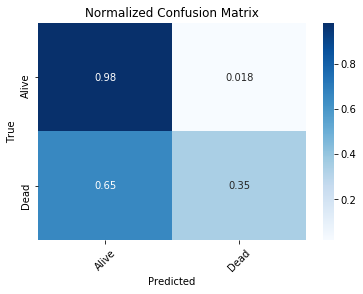

In [64]:
from plots import plot_confusion_matrix
results = [(i[0], i[1]) for i in zip(Y_test, logit_preds)]
class_names = ['Alive', 'Dead']
plot_confusion_matrix(results, class_names)

In [65]:
logit_probs = logit.predict_proba(X_test)
metrics.roc_auc_score(Y_test, logit_probs[:, 1])

0.8945211636968503

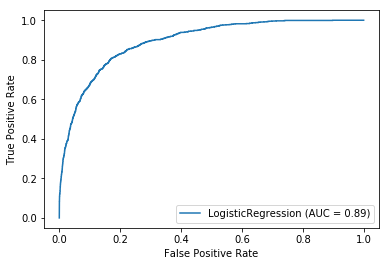

In [66]:
# auc curve

metrics.plot_roc_curve(logit, X_test, Y_test)  
plt.show()

## SVC model

In [72]:
# use C=1 to build the SVM model
svc = SVC(C=1, gamma="scale", probability=True)
svc.fit(X_train, Y_train)
svc_preds = svc.predict(X_test)
svc_accu = accuracy_score(Y_test, svc_preds)
svc_matrix = confusion_matrix(Y_test, svc_preds)

In [73]:
svc_accu

0.9201989619377162

In [74]:
svc_matrix

array([[8126,  112],
       [ 626,  384]])

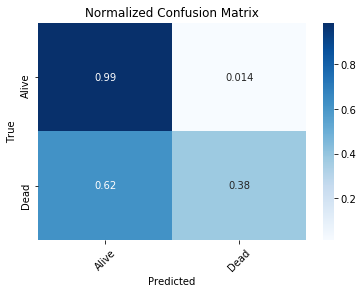

In [75]:
from plots import plot_confusion_matrix
results_svc = [(i[0], i[1]) for i in zip(Y_test, svc_preds)]
class_names = ['Alive', 'Dead']
plot_confusion_matrix(results_svc, class_names)

In [76]:
svc_probs = svc.predict_proba(X_test)
metrics.roc_auc_score(Y_test, svc_probs[:, 1])

0.8442693723123222

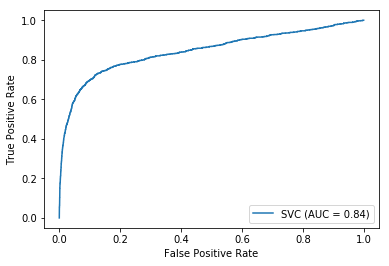

In [77]:
metrics.plot_roc_curve(svc, X_test, Y_test)  
plt.show()